# Bike Sharing Assignment

#### Probelm Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

This dataset is labeled as `day.csv`

# Data Understanding, Cleaning & Feature Data Transformation

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the BoomBikes dataset (`day.csv`)

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
boombikes = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Let's inspect the various aspect of the provided dataset. 

In [5]:
boombikes.shape

(730, 16)

Our dataset has 730 rows & 16 features (columns)

In [6]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


The express information we receive is the non-presence of null values in the dataset. <br>
All features have the full 730 data-points present. 

In [7]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Cleaning the dataset

We start by dropping all features redundant or non-relevant to our purpose. <br>
Four columns are identified to be falling in either of the two bins: <br>
- `instant` [non-relevant]
- `dteday` [redundant]
- `casual` [redundant]
- `registered` [redundant] 

In [8]:
boombikes.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [9]:
# inspecting the updated data-set
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Two columns seem to catch our attention here. `temp` & `atemp` <br>
On closer exploration, one understands that while `temp` has recorded temperature values, `atemp` has "feels-like" temperature values. <br>
This does indicate to a possibility of high coupling between these two features. <br>
Let's now find out. 

In [10]:
boombikes['temp'].corr(boombikes['atemp'])

0.9916961786905648

That's 99.16 % correlation! <br>
We can safely drop one of the two columns. <br>
`atemp` seems more appropriate to drop, in the pursuit for pure statistical inclination. 

In [11]:
boombikes.drop(['atemp'], axis=1, inplace=True)

In [12]:
# inspecting the head
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


## Step 3: Transforming feature data for better comprehensibility

The motivation for this comes from the fact that, as of now, our dataset substitutes integers in the place of strings to describe the state of our categorical variables. <br>

We have the following four categorical variables present: <br>
- `season`
- `mnth`
- `weekday`
- `weathersit`
One look at the dataset reveals all of them have integers as state indicators. We proceed to use the data dictionary in order to decipher & replace them with their more intuitive/readable string parameters. 

In [13]:
# creating feature maps
def season_map(x):
    return x.map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

def month_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 
                  10: 'Oct', 11: 'Nov', 12: 'Dec'})

def weekday_map(x):
    return x.map({0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thur', 4: 'Fri', 5: 'Sat', 6: 'Sun'})

def weathersit_map(x):
    return x.map({1: 'Clear', 2: 'Misty/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Snow/Rain'})

In [14]:
# mapping the integers to their corresponding string values using feature maps

# mapping season
boombikes[['season']] = boombikes[['season']].apply(season_map)

# mapping mnth
boombikes[['mnth']] = boombikes[['mnth']].apply(month_map)

# mapping weekday
boombikes[['weekday']] = boombikes[['weekday']].apply(weekday_map)

# mapping weathersit
boombikes[['weathersit']] = boombikes[['weathersit']].apply(weathersit_map)

In [15]:
# inspecting top 10 rows of our newly mapped dataset
boombikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sun,0,Misty/Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Mon,0,Misty/Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Tue,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Wed,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Thur,1,Clear,9.305237,43.6957,12.522300,1600
5,Spring,0,Jan,0,Fri,1,Clear,8.378268,51.8261,6.000868,1606
6,Spring,0,Jan,0,Sat,1,Misty/Cloudy,8.057402,49.8696,11.304642,1510
7,Spring,0,Jan,0,Sun,0,Misty/Cloudy,6.765000,53.5833,17.875868,959
8,Spring,0,Jan,0,Mon,0,Clear,5.671653,43.4167,24.250650,822
9,Spring,0,Jan,0,Tue,1,Clear,6.184153,48.2917,14.958889,1321


In [16]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


All the categorical variables have now been transformed to of `Dtype` `object` (strings)

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

We proceed to first make the pair-plots of all numeric variables. 

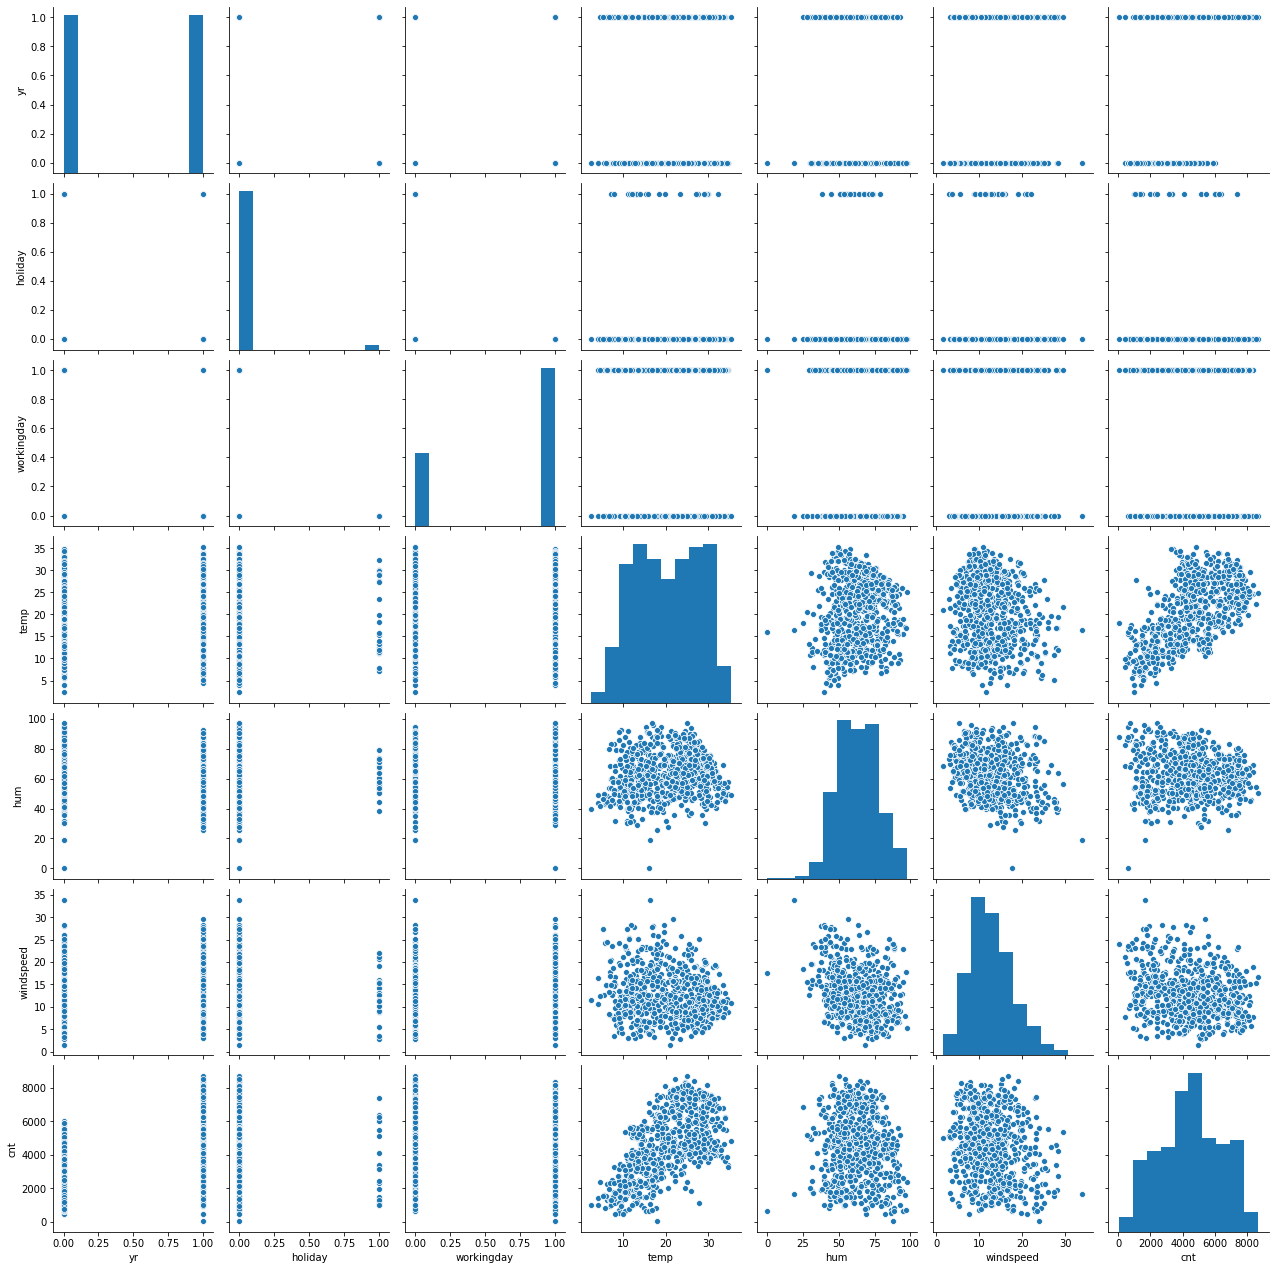

In [18]:
sns.pairplot(boombikes)
plt.show()

We observe here that atleast one of the numerical variables (`temp`) has a linear correlation with the count of bikes taken off docking stations. This indicates the possibility of performing & building a linear regression model. 

#### Visualising Categorical Variables

We proceed to create box-plots to visualize our categorical variables. 

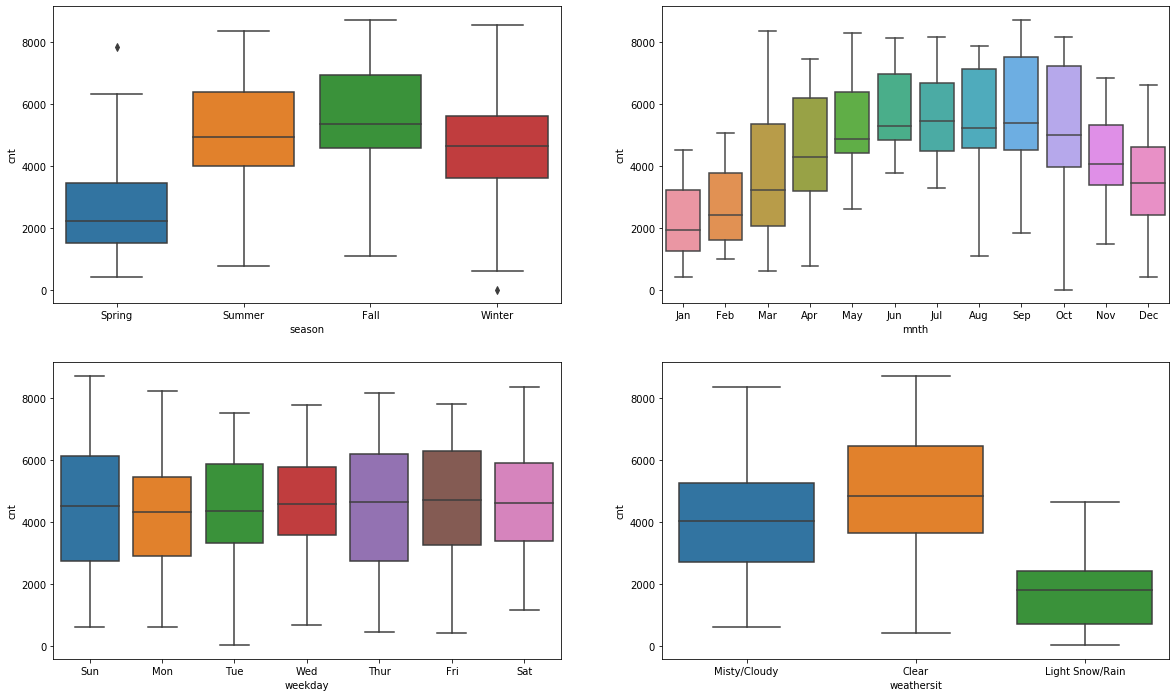

In [19]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = boombikes)
plt.subplot(2,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = boombikes)
plt.subplot(2,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = boombikes)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boombikes)

plt.show()

Some observations that can be derived off the above box-plots are:

- Fall & Summer are the best seasons for Boombike's business. Spring ranks as the worst.
- Business booms in the months of July & September, while tanks in the months of December, January & Feburary. 
- Across weekdays, seemingly the same median number of rides taken. Though, Sunday takes the pie for the highest number of rides taken for a weekday. 
- Clear weather has more affinity to drive Boombikes' business, while light snow/rain completely dampens it. 

We can also visualise some of these categorical features parallely by using the `hue` argument. 
<br>
Below are the plots for 
- `season` with `weekday` as the hue.
- `weathersit` with `weekday` as the hue.
- `season` with `mnth` as the hue.

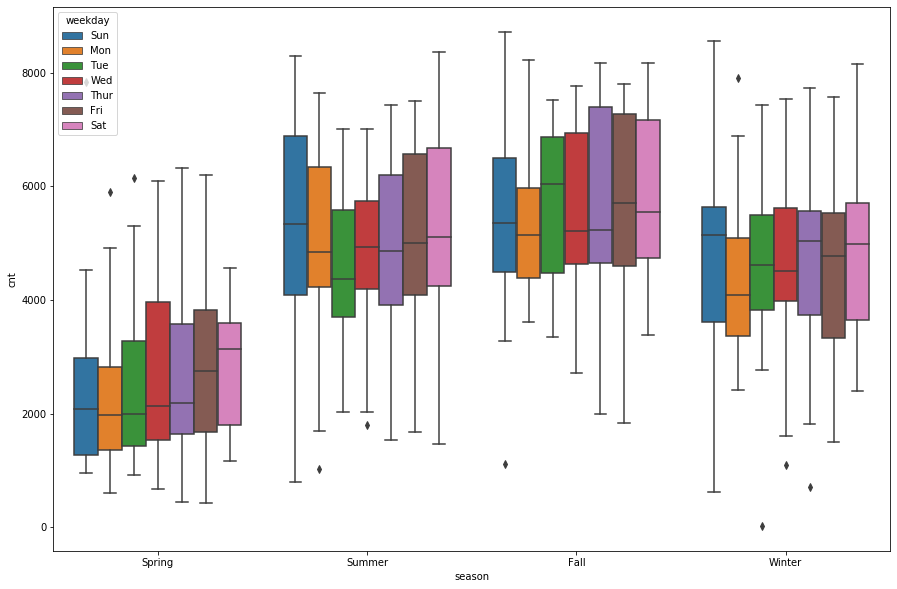

In [20]:
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weekday', data = boombikes)
plt.show()

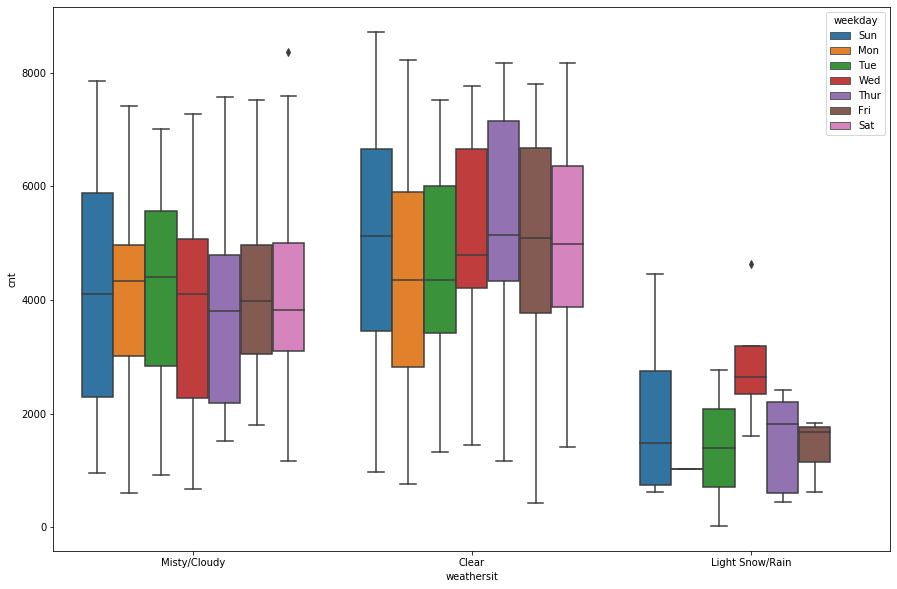

In [21]:
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'weekday', data = boombikes)
plt.show()

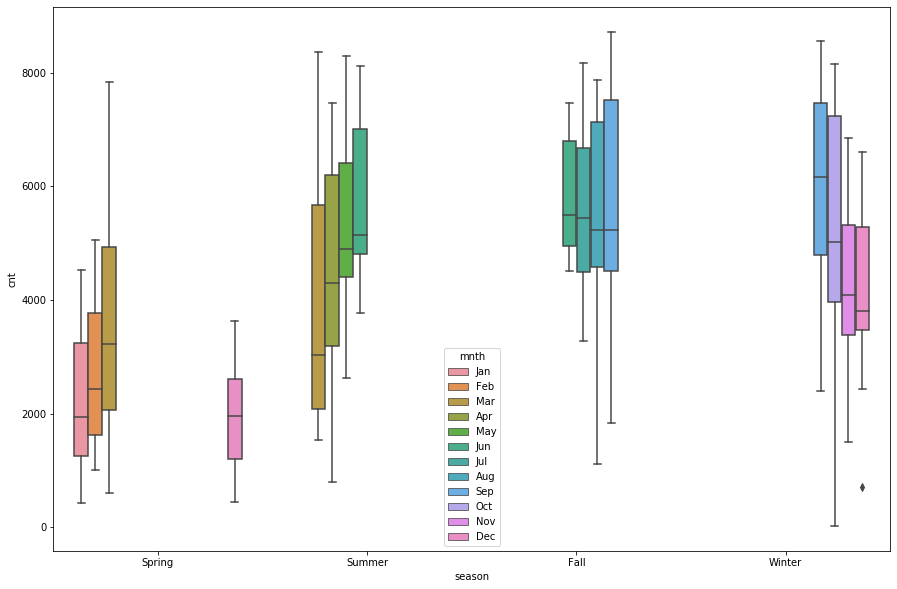

In [22]:
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'season', y = 'cnt', hue = 'mnth', data = boombikes)
plt.show()

Some interesting insights, unravelled at this point, are:

- Sundays drive the highest business across all the seasons. 
- Across three major seasons, Mondays bring in the least of business (by median values). 
- Business of clear Sundays & Thursdays tend to boom, statistically. 
- April drives the highest volume of business in Spring, while June does it for Summer. August drives in the highest numbers for Fall season, while September does it for the Winter. 

### Dummy Variables

The variable `season` has four levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [23]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'dummies'
dummies = pd.get_dummies(boombikes['season'])


In [24]:
# Check what the dataset 'dummies' looks like
dummies.head()

,Fall,Spring,Summer,Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Now, we don't need all these four columns. We can safely proceed to drop the `Fall` column, as it can deciphered using the the other three columns:
- `000` will correspond to `Fall`
- `100` will correspond to `Spring`
- `010` will correspond to `Summer`
- `001` will correspond to `Winter`

In [25]:
# Let's drop the first column from dummies using 'drop_first = True'
dummies = pd.get_dummies(boombikes['season'], drop_first = True)

In [26]:
# Add the results to the original boombikes dataframe
boombikes = pd.concat([boombikes, dummies], axis = 1)

In [27]:
# Now let's see the head of our dataframe.
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,Winter
0,Spring,0,Jan,0,Sun,0,Misty/Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,Spring,0,Jan,0,Mon,0,Misty/Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,Spring,0,Jan,0,Tue,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,Spring,0,Jan,0,Wed,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,Spring,0,Jan,0,Thur,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [28]:
# Drop 'season' as we have created the dummies for it
boombikes.drop(['season'], axis = 1, inplace = True)

In [29]:
# re-inspecting the datset
boombikes.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,Winter
0,0,Jan,0,Sun,0,Misty/Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Mon,0,Misty/Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Tue,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Wed,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Thur,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


We shall fast-track the process for creation of dummy variables for our other remaining categorical variables
- `mnth`
- `weekday`
- `weathersit`

In [30]:
# for mnth

#create dummies
dummies = pd.get_dummies(boombikes['mnth'], drop_first=True)

# concat dummies to the main dataset
boombikes = pd.concat([boombikes, dummies], axis = 1)

# drop the redundant categorical feature
boombikes.drop(['mnth'], axis=1, inplace=True)

In [31]:
# for weekday

#create dummies
dummies = pd.get_dummies(boombikes['weekday'], drop_first=True)

# concat dummies to the main dataset
boombikes = pd.concat([boombikes, dummies], axis = 1)

# drop the redundant categorical feature
boombikes.drop(['weekday'], axis=1, inplace=True)

In [32]:
# for weathersit

#create dummies
dummies = pd.get_dummies(boombikes['weathersit'], drop_first=True)

# concat dummies to the main dataset
boombikes = pd.concat([boombikes, dummies], axis = 1)

# drop the redundant categorical feature
boombikes.drop(['weathersit'], axis=1, inplace=True)

In [33]:
# inspecting the head of the upated dataset
boombikes.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light Snow/Rain,Misty/Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,1,8.378268,51.8261,6.000868,1606,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,8.057402,49.8696,11.304642,1510,1,0,0,...,0,0,0,1,0,0,0,0,0,1
7,0,0,0,6.765000,53.5833,17.875868,959,1,0,0,...,0,0,0,0,1,0,0,0,0,1
8,0,0,0,5.671653,43.4167,24.250650,822,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,1,6.184153,48.2917,14.958889,1321,1,0,0,...,0,0,0,0,0,0,1,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [34]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(boombikes, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We shall achieve this using MinMax scaling. 

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
# Apply scaler() to all the columns except the binary variables and 'dummy' variables
features_to_be_scaled = ['temp', 'hum', 'windspeed', 'cnt']

df_train[features_to_be_scaled] = scaler.fit_transform(df_train[features_to_be_scaled])

In [38]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light Snow/Rain,Misty/Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [39]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light Snow/Rain,Misty/Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


You may observe how the max values across all the numerical features (`temp`, `hum`, `windspeed` & `cnt` is now 1 & min is 0)

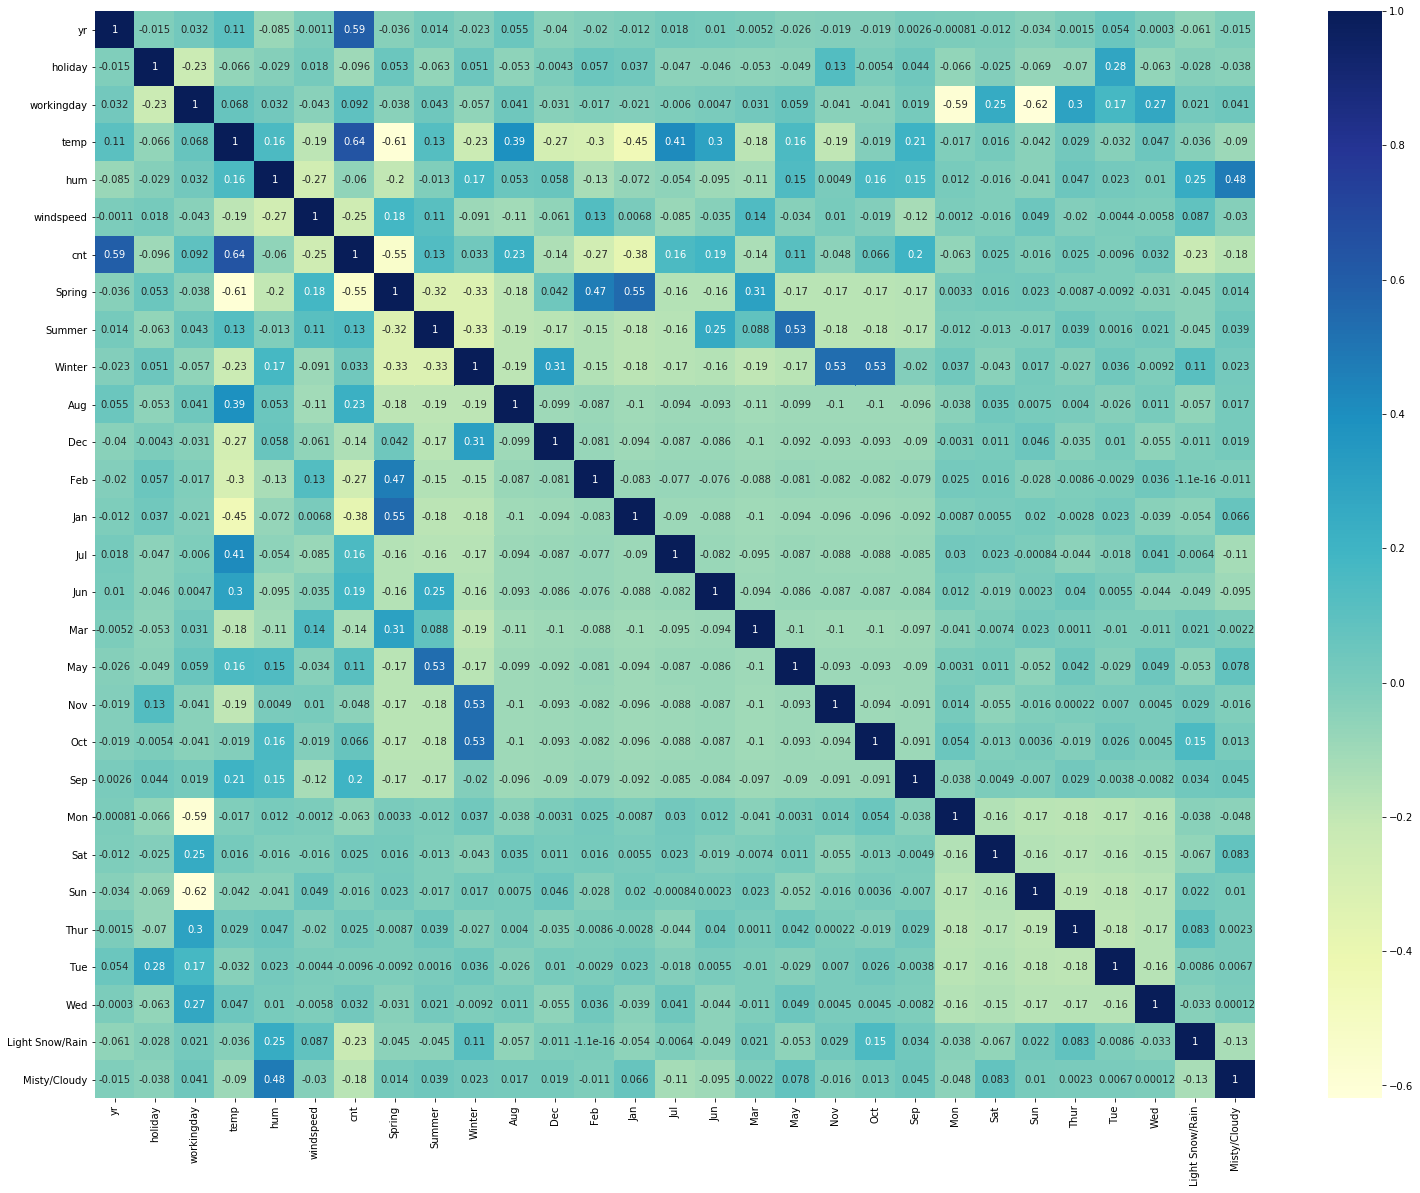

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (26, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `temp` seems to the correlated to `cnt` the most. Let's see a pairplot for `temp` vs `cnt`

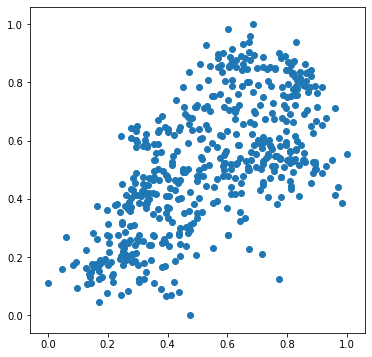

In [41]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [42]:
y_train = df_train.pop('cnt')
X_train = df_train

# Building our model

This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [43]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [44]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed',
       'Light Snow/Rain', 'Misty/Cloudy'],
      dtype='object')

In [45]:
# Running RFE with the output number of the variable equal to 28
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 28)                # running RFE
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', True, 1),
 ('Mar', True, 1),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thur', True, 1),
 ('Tue', True, 1),
 ('Wed', True, 1),
 ('Light Snow/Rain', True, 1),
 ('Misty/Cloudy', True, 1)]

Since the amount of features are manangeable, we can now start with manual feature selection (fine-tuning).

### Building model using statsmodel, for the detailed statistics

Since, RFE led to elimination of no features from our X_train dataset, we continue with the sme dataset for further rolling analysis. 

In [47]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)

In [48]:
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model

In [49]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          8.74e-182
Time:                        23:14:41   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2414      0.035     

We now see that `Mar` has the highest p value among all the other features. So it is insignificant in the presence of them. <br>
We can proceed to drop it. <br>

This will be the same rule of thumb used to drop columns, based on the highest p value at that iterative step, until we are left only with significant columns (p value less than 0.05)

In [50]:
X_train_new = X_train.drop(["Mar"], axis = 1)

Rebuilding the model without `Mar`

In [51]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          8.33e-183
Time:                        23:14:41   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2419      0.033     

In [52]:
# dropping Jun
X_train_new = X_train_new.drop(["Jun"], axis = 1)

In [53]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.6
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          7.84e-184
Time:                        23:14:41   Log-Likelihood:                 527.94
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     484   BIC:                            -893.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2415      0.033     

In [54]:
# dropping holiday
X_train_new = X_train_new.drop(["holiday"], axis = 1)

In [55]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.6
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          7.84e-184
Time:                        23:14:41   Log-Likelihood:                 527.94
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     484   BIC:                            -893.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2462      0.050     

In [56]:
# dropping Thur
X_train_new = X_train_new.drop(["Thur"], axis = 1)

In [57]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          7.39e-185
Time:                        23:14:41   Log-Likelihood:                 527.91
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     485   BIC:                            -900.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2476      0.049     

In [58]:
# dropping Oct
X_train_new = X_train_new.drop(["Oct"], axis = 1)

In [59]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.9
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          6.82e-186
Time:                        23:14:41   Log-Likelihood:                 527.87
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     486   BIC:                            -906.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2500      0.048     

In [60]:
# dropping Sat
X_train_new = X_train_new.drop(["Sat"], axis = 1)

In [61]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     128.6
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          6.87e-187
Time:                        23:14:41   Log-Likelihood:                 527.72
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     487   BIC:                            -912.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2531      0.048     

In [62]:
# dropping Aug
X_train_new = X_train_new.drop(["Aug"], axis = 1)

In [63]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     134.9
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          7.12e-188
Time:                        23:14:41   Log-Likelihood:                 527.51
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     488   BIC:                            -917.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2611      0.046     

In [64]:
# dropping Wed
X_train_new = X_train_new.drop(["Wed"], axis = 1)

In [65]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     141.5
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          1.09e-188
Time:                        23:14:41   Log-Likelihood:                 526.86
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     489   BIC:                            -922.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2595      0.046     

In [66]:
# dropping Tue
X_train_new = X_train_new.drop(["Tue"], axis = 1)

In [67]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          1.59e-189
Time:                        23:14:41   Log-Likelihood:                 526.24
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2494      0.045     

In [68]:
# dropping May
X_train_new = X_train_new.drop(["May"], axis = 1)

In [69]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          3.55e-190
Time:                        23:14:41   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2374      0.044     

In [70]:
# dropping Feb
X_train_new = X_train_new.drop(["Feb"], axis = 1)

In [71]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          9.55e-191
Time:                        23:14:41   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2239      0.044     

In [72]:
# dropping Mon
X_train_new = X_train_new.drop(["Mon"], axis = 1)

In [73]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          4.53e-191
Time:                        23:14:41   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2694      0.037     

In [74]:
# dropping const feature before VIF analysis
X_train_new = X_train_new.drop(['const'], axis=1)

In [75]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.14
2,temp,18.94
4,windspeed,4.77
1,workingday,4.76
5,Spring,4.50
7,Winter,4.11
6,Summer,2.86
15,Misty/Cloudy,2.32
0,yr,2.09
13,Sun,1.86


In [76]:
# dropping hum due to high VIF (> 5)
X_train_new = X_train_new.drop(['hum'], axis=1)

In [77]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.92
1,workingday,4.73
3,windspeed,4.71
4,Spring,3.09
6,Winter,3.02
5,Summer,2.32
0,yr,2.08
12,Sun,1.86
10,Nov,1.78
8,Jan,1.67


In [78]:
# dropping temp due to high VIF (> 5)
X_train_new = X_train_new.drop(['temp'], axis=1)

In [79]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.25
1,workingday,3.55
3,Spring,3.03
5,Winter,3.00
4,Summer,2.25
0,yr,1.91
9,Nov,1.76
7,Jan,1.64
11,Sun,1.63
13,Misty/Cloudy,1.56


In [80]:
# adding the constant back before linear modelling, done in order to verify the p value levels
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     140.2
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          5.05e-162
Time:                        23:14:41   Log-Likelihood:                 447.16
No. Observations:                 510   AIC:                            -864.3
Df Residuals:                     495   BIC:                            -800.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5460      0.019     

In [81]:
# dropping Jul. This feature became insignificant after we dealt with multi-collinearity using VIF. 
X_train_new = X_train_new.drop(["Jul"], axis = 1)

lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     151.1
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          5.30e-163
Time:                        23:14:41   Log-Likelihood:                 446.87
No. Observations:                 510   AIC:                            -865.7
Df Residuals:                     496   BIC:                            -806.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5400      0.017     

In [82]:
# dropping Winter (high p value > 0.05)
X_train_new = X_train_new.drop(["Winter"], axis = 1)

lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     163.8
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          5.41e-164
Time:                        23:14:41   Log-Likelihood:                 446.58
No. Observations:                 510   AIC:                            -867.2
Df Residuals:                     497   BIC:                            -812.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5360      0.016     

In [83]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [84]:
# re-affirming the VIF values after dropping the above features
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.92
1,workingday,3.20
3,Spring,2.38
0,yr,1.87
4,Summer,1.77
6,Jan,1.63
9,Sun,1.54
11,Misty/Cloudy,1.54
7,Nov,1.22
8,Sep,1.20


Everything looks great!

In [85]:
# adding constant back
X_train_new = sm.add_constant(X_train_new)

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [86]:
y_train_cnt_pred = lm.predict(X_train_new)

In [87]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

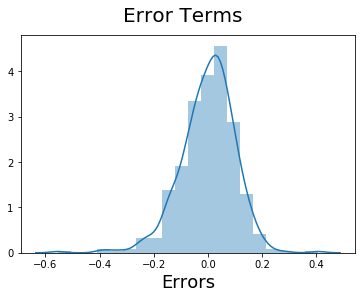

In [88]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Clearly, the errors are normally distributed with a mean of 0. 

## Making Predictions

#### Applying the scaling on the test sets

In [89]:
vars_to_be_scaled = ['temp', 'hum', 'windspeed', 'cnt']

df_test[vars_to_be_scaled] = scaler.transform(df_test[vars_to_be_scaled])

In [90]:
y_test = df_test.pop('cnt')
X_test = df_test

In [91]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [92]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [93]:
X_test_new.columns

Index(['const', 'yr', 'workingday', 'windspeed', 'Spring', 'Summer', 'Dec',
       'Jan', 'Nov', 'Sep', 'Sun', 'Light Snow/Rain', 'Misty/Cloudy'],
      dtype='object')

In [94]:
lm.params

const              0.535951
yr                 0.245744
workingday         0.057024
windspeed         -0.192617
Spring            -0.238120
Summer            -0.040292
Dec               -0.118632
Jan               -0.123145
Nov               -0.112736
Sep                0.055846
Sun                0.066525
Light Snow/Rain   -0.320724
Misty/Cloudy      -0.090099
dtype: float64

In [95]:
# Making predictions
y_test_cnt_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_test_cnt_pred')

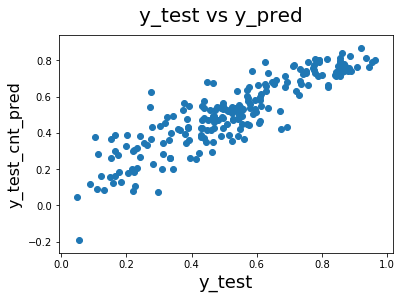

In [96]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_cnt_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_cnt_pred', fontsize=16)                 # Y-label

In [97]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_cnt_pred)

0.7832504527952755

Therefore, our model was able to explain variance of 78% for unsees (test-set) values. <br>
This is indeed a fairly decent model. 